# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
num_mice = len(merge_df["Mouse ID"].unique())
num_mice

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicated_mice


array(['g989'], dtype=object)

In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merge_df.loc[merge_df['Mouse ID'].isin(duplicated_mice)]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(subset=['Mouse ID'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [38]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_df['Mouse ID'].nunique()
num_mice

249

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: #
summary_table = merge_df[["Drug Regimen", "Tumor Volume (mm3)"]]
group_by = summary_table.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_df = pd.DataFrame({
    "Mean Tumor Volume": group_by["Tumor Volume (mm3)"].mean().map('{:.3f}'.format),
    "Median Tumor Volume": group_by["Tumor Volume (mm3)"].median().map('{:.3f}'.format),
    "Tumor Volume Variance": group_by["Tumor Volume (mm3)"].var().map('{:.3f}'.format),
    "Tumor Volume Std. Dev.": group_by["Tumor Volume (mm3)"].std().map('{:.3f}'.format),
    "Tumor Volume Std. Err.": group_by["Tumor Volume (mm3)"].sem().map('{:.3f}'.format)})

# Assemble the resulting series into a single summary DataFrame.
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [27]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_df = group_by["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df.columns = pd.MultiIndex.from_tuples([('Tumor Volume (mm3)', col) for col in summary_df.columns])
summary_df
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

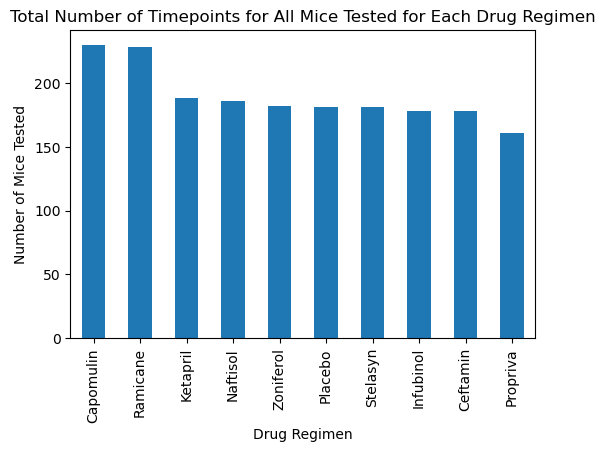

<Figure size 640x480 with 0 Axes>

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_tested = merge_df['Drug Regimen'].value_counts().sort_values(ascending=False)
timepoints_tested.plot(kind='bar', figsize=(6,4))
plt.title('Total Number of Timepoints for All Mice Tested for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()
plt.tight_layout()

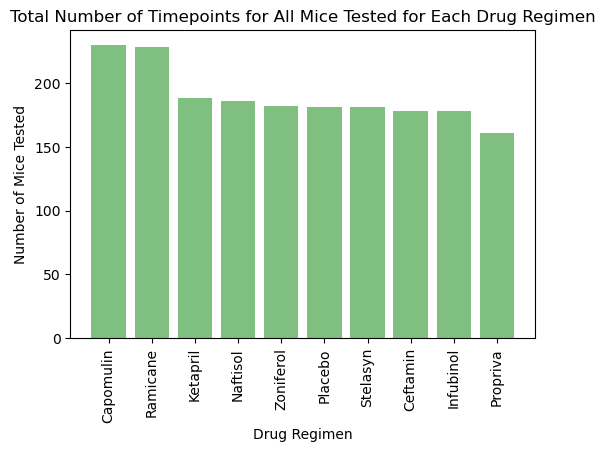

<Figure size 640x480 with 0 Axes>

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints_df = merge_df.groupby('Drug Regimen')['Timepoint'].count().reset_index(name='Total Timepoints')
timepoints_df = timepoints_df.sort_values(by='Total Timepoints', ascending=False)
plt.figure(figsize=(6,4))
plt.bar(timepoints_df['Drug Regimen'], timepoints_df['Total Timepoints'], color='green',alpha= 0.5)
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title('Total Number of Timepoints for All Mice Tested for Each Drug Regimen')
plt.show()
plt.tight_layout()


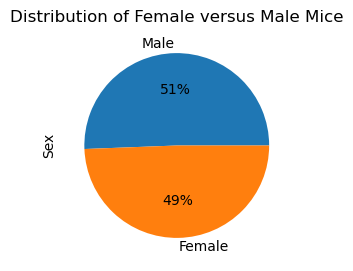

<Figure size 640x480 with 0 Axes>

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = merge_df["Sex"].value_counts()
gender_df.plot(kind="pie", y="Sex", figsize=(3, 3), autopct="%1.0f%%", startangle=0)
plt.title("Distribution of Female versus Male Mice")
plt.show()
plt.tight_layout()

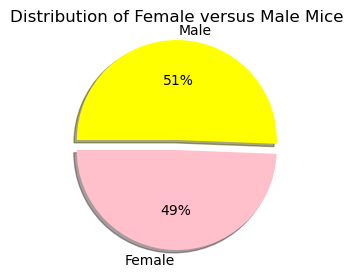

<Figure size 640x480 with 0 Axes>

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_grouped = merge_df.groupby(['Sex'])
sex_counts = sex_grouped['Mouse ID'].count()
plt.figure(figsize=(3,3))
explode = (0.1,0)
plt.pie(sex_counts, labels=sex_counts.index,colors = ['pink','yellow'], explode= explode, autopct='%1.0f%%',shadow= True, startangle=180)
plt.title('Distribution of Female versus Male Mice')
plt.axis("equal")
plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
last_timepoint_df = clean_df.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume_df = pd.merge(last_timepoint_df, clean_df, on=['Mouse ID', 'Drug Regimen', 'Timepoint'])
final_volume_df = final_volume_df[final_volume_df['Drug Regimen'].isin(treatment_regimens)]

In [57]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
        tumor_vol = merge_df.loc[merge_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # add subset 
        tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f"{drug}:")
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"Outliers: {outliers}\n")


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 17)

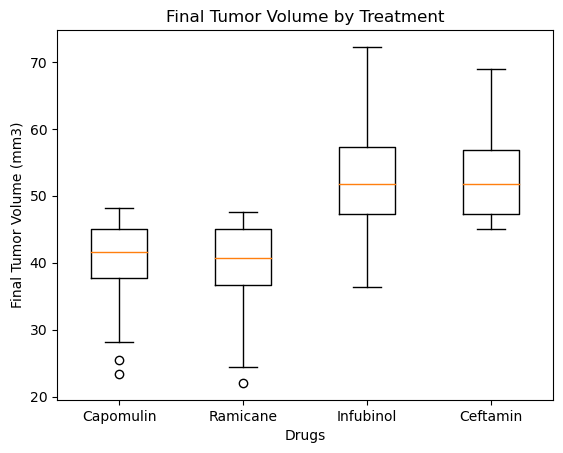

In [58]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volumes = []

for treatment in treatments:

    final_tumor_volumes = merge_df.loc[merge_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volumes.append(final_tumor_volumes)

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume by Treatment")
ax1.set_xlabel("Drugs")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_volumes, labels=treatments)
plt.show()


## Line and Scatter Plots

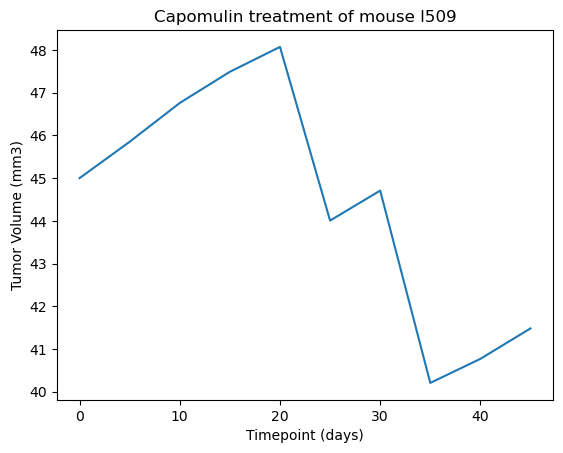

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = merge_df[merge_df["Drug Regimen"] == "Capomulin"]
mouse_id = "l509"
mouse_df = capomulin_df[capomulin_df["Mouse ID"] == mouse_id][["Timepoint", "Tumor Volume (mm3)"]]

plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.show()

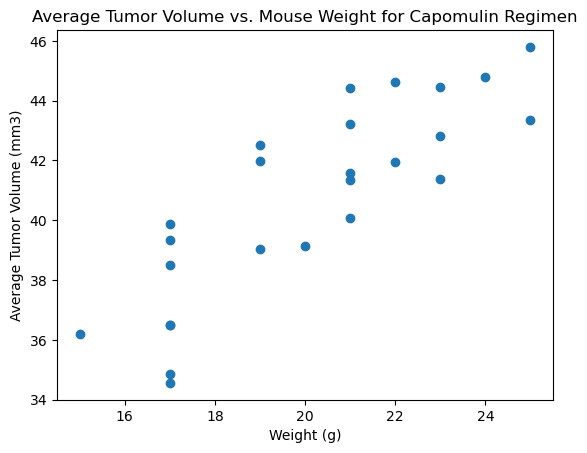

In [60]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = merge_df[merge_df["Drug Regimen"] == "Capomulin"]
capomulin_grouped = capomulin_df.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})

plt.scatter(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.show()

## Correlation and Regression

C:\Users\zeesh\AppData\Local\Temp\ipykernel_50044\1385494358.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_grouped = capomulin_df.groupby("Mouse ID").mean()


The correlation between mouse weight and the average tumor volume for the Capomulin regimen is 0.84


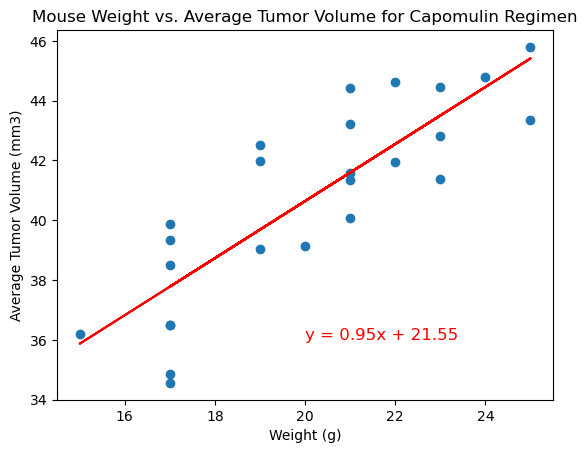

In [61]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_df = merge_df[merge_df["Drug Regimen"] == "Capomulin"]
capomulin_grouped = capomulin_df.groupby("Mouse ID").mean()
plt.scatter(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"])

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

correlation = st.pearsonr(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"])[0]
print(f"The correlation between mouse weight and the average tumor volume for the Capomulin regimen is {round(correlation, 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"])
regress_values = capomulin_grouped["Weight (g)"] * slope + intercept
plt.plot(capomulin_grouped["Weight (g)"], regress_values, color='r')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (20, 36), fontsize=12, color="r")

plt.show()